In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import pandas as pd
import pdb
#Define Computer
Malphigui=1
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10 ),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 22}
pylab.rcParams.update(params)

if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Boundary'
    csv_directory='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Boundary/csv_outputs'
    directory_article_figures='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Code/'
    os.chdir(directory)
    directory_script='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Boundary'
    csv_directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Boundary/csv_outputs'
os.chdir(directory)

from Testing import extract_COMSOL_data, save_csv
from Small_functions import get_MRE

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/linear'

In [12]:
#The array of distances adimensionalized with h
d_array=np.squeeze(pd.read_csv(csv_directory + '/d_array_h.csv').to_numpy())
d_array=np.around(d_array, decimals=2)
print(d_array) 

[0.02 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2 ]


In [13]:
q_FEM=np.squeeze(pd.read_csv(csv_directory + '/q_FEM_array.csv').to_numpy())
q_FV=np.squeeze(pd.read_csv(csv_directory + '/q_FV_array.csv').to_numpy())
q_Multi=np.squeeze(pd.read_csv(csv_directory + '/q_Multi_array.csv').to_numpy())

err_q_FV=np.abs((q_FV-q_FEM)/q_FEM)
err_q_Multi=np.abs((q_Multi-q_FEM)/q_FEM)

In [14]:
err_phi_Multi=np.squeeze(pd.read_csv(csv_directory + '/err_phi_Multi_point.csv').to_numpy())
err_phi_FV=np.squeeze(pd.read_csv(csv_directory + '/err_phi_FV.csv').to_numpy())

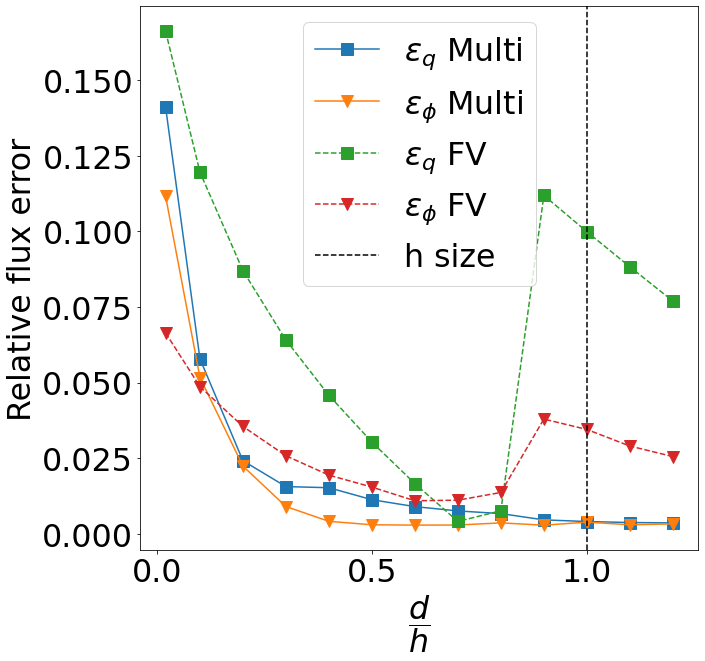

In [34]:
plt.plot(d_array,err_q_Multi, '-s', markersize=12,label='$\\varepsilon_q$ Multi')
plt.plot(d_array,err_phi_Multi, '-v', markersize=12,label='$\\varepsilon_{\phi}$ Multi')
plt.plot(d_array,err_q_FV, '--s', markersize=12,label='$\\varepsilon_q$ FV')
plt.plot(d_array,err_phi_FV, '--v', markersize=12,label='$\\varepsilon_{\phi}$ FV')
plt.axvline(x=1, color='k', linestyle='--', label='h size')
plt.legend()
plt.xlabel('$\dfrac{d}{h}$')
#plt.yscale('log')
plt.ylabel('Relative flux error')

plt.savefig(directory_article_figures + '/Single_source/Boundary/errs.pdf')